In [ ]:
# Phase 5: Advanced Pandas & NumPy Integration
# Data Manipulation, GroupBy, Merging, and Real-World Applications

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('🚀 Phase 5: Advanced Pandas Operations')
print('=' * 60)
print('Topics covered:')
print('  • GroupBy operations')
print('  • Merging and joining DataFrames')
print('  • Time series analysis')
print('  • File I/O (CSV)')
print('  • NumPy + Pandas integration')
print('  • Real-world business applications')


In [2]:
# GroupBy Operations - Split, Apply, Combine
import   pandas as pd
# Create sample sales data
sales = pd.DataFrame({
    'Date': ['2024-01-15', '2024-01-16', '2024-01-15', '2024-01-16', '2024-01-15', '2024-01-16'],
    'Salesperson': ['John', 'John', 'Emma', 'Emma', 'Michael', 'Michael'],
    'Region': ['North', 'North', 'South', 'South', 'East', 'East'],
    'Product': ['Laptop', 'Mouse', 'Laptop', 'Keyboard', 'Monitor', 'Mouse'],
    'Quantity': [2, 5, 3, 4, 1, 10],
    'Revenue': [2400, 125, 3600, 300, 350, 250]
})

print("Sample Sales Data:")
print(sales)
print("\n" + "="*60)

# Group by single column
print("\n1. Total Revenue by Salesperson:")
revenue_by_person = sales.groupby('Salesperson')['Revenue'].sum()
print(revenue_by_person)
print()

# Multiple aggregations
print("2. Multiple statistics by Salesperson:")
stats_by_person = sales.groupby('Salesperson').agg({
    'Revenue': ['sum', 'mean', 'count'],
    'Quantity': ['sum', 'mean']
})
print(stats_by_person)
print()

# Group by multiple columns
print("3. Revenue by Region and Salesperson:")
revenue_by_region_person = sales.groupby(['Region', 'Salesperson'])['Revenue'].sum()
print(revenue_by_region_person)
print()

# Using custom functions
print("4. Custom aggregation - Revenue range:")
custom_agg = sales.groupby('Salesperson')['Revenue'].agg(['min', 'max', lambda x: x.max() - x.min()])
custom_agg.columns = ['Min Revenue', 'Max Revenue', 'Revenue Range']
print(custom_agg)
print()

# Transform - keeping same shape
print("5. Revenue as percentage of person's total:")
sales['Revenue_Pct'] = sales.groupby('Salesperson')['Revenue'].transform(lambda x: (x / x.sum()) * 100)
print(sales[['Salesperson', 'Revenue', 'Revenue_Pct']])
print()

# Filter groups
print("6. Only salespeople with total revenue > 500:")
high_revenue = sales.groupby('Salesperson').filter(lambda x: x['Revenue'].sum() > 500)
print(high_revenue)


Sample Sales Data:
         Date Salesperson Region   Product  Quantity  Revenue
0  2024-01-15        John  North    Laptop         2     2400
1  2024-01-16        John  North     Mouse         5      125
2  2024-01-15        Emma  South    Laptop         3     3600
3  2024-01-16        Emma  South  Keyboard         4      300
4  2024-01-15     Michael   East   Monitor         1      350
5  2024-01-16     Michael   East     Mouse        10      250


1. Total Revenue by Salesperson:
Salesperson
Emma       3900
John       2525
Michael     600
Name: Revenue, dtype: int64

2. Multiple statistics by Salesperson:
            Revenue               Quantity     
                sum    mean count      sum mean
Salesperson                                    
Emma           3900  1950.0     2        7  3.5
John           2525  1262.5     2        7  3.5
Michael         600   300.0     2       11  5.5

3. Revenue by Region and Salesperson:
Region  Salesperson
East    Michael         600
North   J

In [ ]:
# Merging and Joining DataFrames

# Create sample DataFrames
employees = pd.DataFrame({
    'Employee_ID': [101, 102, 103, 104, 105],
    'Name': ['John', 'Emma', 'Michael', 'Sophia', 'William'],
    'Department_ID': [1, 2, 1, 3, 2]
})

departments = pd.DataFrame({
    'Department_ID': [1, 2, 3, 4],
    'Department_Name': ['Sales', 'IT', 'HR', 'Marketing'],
    'Budget': [100000, 150000, 80000, 120000]
})

salaries = pd.DataFrame({
    'Employee_ID': [101, 102, 103, 104, 106],
    'Salary': [75000, 82000, 68000, 79000, 88000],
    'Bonus': [5000, 6000, 4000, 5500, 6500]
})

print("Employees DataFrame:")
print(employees)
print("\nDepartments DataFrame:")
print(departments)
print("\nSalaries DataFrame:")
print(salaries)
print("\n" + "="*60)

# Inner join
print("\n1. Inner Join - Employees with Departments:")
inner_merged = pd.merge(employees, departments, on='Department_ID', how='inner')
print(inner_merged)
print()

# Left join
print("2. Left Join - All Employees with Department info:")
left_merged = pd.merge(employees, departments, on='Department_ID', how='left')
print(left_merged)
print()

# Right join
print("3. Right Join - All Departments with Employee info:")
right_merged = pd.merge(employees, departments, on='Department_ID', how='right')
print(right_merged)
print()

# Outer join
print("4. Outer Join - All Employees and All Departments:")
outer_merged = pd.merge(employees, departments, on='Department_ID', how='outer')
print(outer_merged)
print()

# Multiple merges
print("5. Merge Employees with Departments and Salaries:")
complete_data = pd.merge(employees, departments, on='Department_ID', how='left')
complete_data = pd.merge(complete_data, salaries, on='Employee_ID', how='left')
print(complete_data)
print()

# Concatenate DataFrames
new_employees = pd.DataFrame({
    'Employee_ID': [106, 107],
    'Name': ['Olivia', 'James'],
    'Department_ID': [3, 1]
})

print("6. Concatenate (stack) DataFrames:")
all_employees = pd.concat([employees, new_employees], ignore_index=True)
print(all_employees)


In [ ]:
# Time Series Analysis with Pandas

# Create time series data
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
np.random.seed(42)
sales_values = np.random.randint(1000, 5000, size=len(date_range)) + np.sin(np.arange(len(date_range)) * 2 * np.pi / 365) * 500

time_series_df = pd.DataFrame({
    'Date': date_range,
    'Sales': sales_values
})

# Convert to datetime and set as index
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])
time_series_df.set_index('Date', inplace=True)

print("Time Series Data (first 10 rows):")
print(time_series_df.head(10))
print()

# Date-based selection
print("1. Sales for January 2024:")
jan_sales = time_series_df['2024-01']
print(f"Total sales: ${jan_sales['Sales'].sum():,.2f}")
print(f"Average daily sales: ${jan_sales['Sales'].mean():,.2f}")
print()

# Resampling - aggregate by month
print("2. Monthly Total Sales:")
monthly_sales = time_series_df.resample('ME').sum()
print(monthly_sales.head())
print()

print("3. Monthly Average Sales:")
monthly_avg = time_series_df.resample('ME').mean()
print(monthly_avg.head())
print()

# Rolling window calculations
print("4. 7-day Moving Average:")
time_series_df['Sales_7day_MA'] = time_series_df['Sales'].rolling(window=7).mean()
print(time_series_df.head(10))
print()

# Date components
time_series_df['Year'] = time_series_df.index.year
time_series_df['Month'] = time_series_df.index.month
time_series_df['Day_of_Week'] = time_series_df.index.dayofweek
time_series_df['Week_of_Year'] = time_series_df.index.isocalendar().week

print("5. Average Sales by Day of Week:")
avg_by_day = time_series_df.groupby('Day_of_Week')['Sales'].mean()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day.index = days
print(avg_by_day)
print()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Daily sales over time
axes[0, 0].plot(time_series_df.index, time_series_df['Sales'], alpha=0.5, linewidth=0.5)
axes[0, 0].plot(time_series_df.index, time_series_df['Sales_7day_MA'], 'r-', linewidth=2, label='7-day MA')
axes[0, 0].set_title('Daily Sales with 7-day Moving Average')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sales ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Monthly sales
axes[0, 1].bar(range(len(monthly_sales)), monthly_sales['Sales'])
axes[0, 1].set_title('Monthly Total Sales')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Sales ($)')
axes[0, 1].set_xticks(range(len(monthly_sales)))
axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Average sales by day of week
axes[1, 0].bar(days, avg_by_day.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE'])
axes[1, 0].set_title('Average Sales by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Average Sales ($)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Sales distribution
axes[1, 1].hist(time_series_df['Sales'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(time_series_df['Sales'].mean(), color='r', linestyle='--', linewidth=2, label=f"Mean: ${time_series_df['Sales'].mean():.0f}")
axes[1, 1].set_title('Sales Distribution')
axes[1, 1].set_xlabel('Sales ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Reading and Writing CSV Files

# Create sample data and save to CSV
sample_data = pd.DataFrame({
    'Product_ID': [1, 2, 3, 4, 5],
    'Product_Name': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Headphones'],
    'Category': ['Electronics', 'Accessories', 'Accessories', 'Electronics', 'Accessories'],
    'Price': [1200, 25, 75, 350, 150],
    'Stock': [15, 100, 50, 25, 40]
})

# Write to CSV
csv_filename = 'products.csv'
sample_data.to_csv(csv_filename, index=False)
print(f"✅ Data saved to '{csv_filename}'")
print("\nData written:")
print(sample_data)
print("\n" + "="*60)

# Read from CSV
print(f"\n📖 Reading data from '{csv_filename}':")
df_from_csv = pd.read_csv(csv_filename)
print(df_from_csv)
print()

# Read with specific options
print("Reading CSV with custom options (only first 3 rows, specific columns):")
df_custom = pd.read_csv(csv_filename, nrows=3, usecols=['Product_Name', 'Price'])
print(df_custom)
print()

# Append data to CSV
new_products = pd.DataFrame({
    'Product_ID': [6, 7],
    'Product_Name': ['Webcam', 'USB Cable'],
    'Category': ['Accessories', 'Accessories'],
    'Price': [80, 15],
    'Stock': [30, 150]
})

# Append to existing CSV
new_products.to_csv(csv_filename, mode='a', header=False, index=False)
print("✅ New products appended to CSV")

# Read updated CSV
df_updated = pd.read_csv(csv_filename)
print("\nUpdated data from CSV:")
print(df_updated)
print()

# Export with formatting
formatted_filename = 'products_formatted.csv'
df_updated.to_csv(formatted_filename, index=False, float_format='%.2f')
print(f"✅ Formatted data saved to '{formatted_filename}'")


In [5]:
# NumPy and Pandas Integration
import numpy as np
import pandas as pd
print("🔗 NumPy + Pandas Integration Examples")
print("="*60)

# Convert Pandas to NumPy and vice versa
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
})

print("\n1. DataFrame to NumPy array:")
print("Original DataFrame:")
print(df)
print("\nConverted to NumPy array:")
np_array = df.to_numpy()
print(np_array)
print("Type:", type(np_array))
print()

# NumPy array to DataFrame
print("2. NumPy array to DataFrame:")
np_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df_from_np = pd.DataFrame(np_data, columns=['X', 'Y', 'Z'])
print(df_from_np)
print()

# Vectorized operations with NumPy functions
print("3. Apply NumPy functions to Pandas:")
df['A_squared'] = np.square(df['A'])
df['B_sqrt'] = np.sqrt(df['B'])
df['C_log'] = np.log10(df['C'])
print(df)
print()

# Broadcasting with NumPy
print("4. Broadcasting operations:")
matrix_df = pd.DataFrame(np.random.randint(1, 10, size=(4, 3)), columns=['Col1', 'Col2', 'Col3'])
print("Original DataFrame:")
print(matrix_df)
print("\nMultiply by NumPy array [2, 3, 4]:")
multiplied = matrix_df * np.array([2, 3, 4])
print(multiplied)
print()

# Using NumPy for statistical operations
print("5. Statistical operations with NumPy:")
sales_df = pd.DataFrame({
    'Product': ['A', 'B', 'C', 'D', 'E'],
    'Q1': [100, 150, 200, 120, 180],
    'Q2': [110, 145, 210, 125, 175],
    'Q3': [120, 160, 195, 130, 190],
    'Q4': [115, 155, 205, 135, 185]
})
print("Sales DataFrame:")
print(sales_df)
print()

# Calculate using NumPy
quarterly_data = sales_df[['Q1', 'Q2', 'Q3', 'Q4']].to_numpy()
sales_df['Mean'] = np.mean(quarterly_data, axis=1)
sales_df['Std'] = np.std(quarterly_data, axis=1)
sales_df['Total'] = np.sum(quarterly_data, axis=1)
print("With NumPy calculations:")
print(sales_df)
print()

# Matrix operations
print("6. Matrix operations with NumPy on DataFrames:")
matrix_a = pd.DataFrame(np.array([[1, 2], [3, 4]]), columns=['A', 'B'])
matrix_b = pd.DataFrame(np.array([[5, 6], [7, 8]]), columns=['A', 'B'])

print("Matrix A:")
print(matrix_a)
print("\nMatrix B:")
print(matrix_b)

# Matrix multiplication
result = pd.DataFrame(np.matmul(matrix_a.values, matrix_b.values), columns=['A', 'B'])
print("\nMatrix multiplication (A @ B):")
print(result)
print()

# Element-wise operations
print("7. Element-wise NumPy operations:")
data = pd.DataFrame({
    'Values': [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
})
data['Sqrt'] = np.sqrt(data['Values'])
data['Log'] = np.log(data['Values'])
data['Exp'] = np.exp(data['Values'] / 100)  # Scaled down to avoid overflow
print(data)


🔗 NumPy + Pandas Integration Examples

1. DataFrame to NumPy array:
Original DataFrame:
   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400
4  5  50  500

Converted to NumPy array:
[[  1  10 100]
 [  2  20 200]
 [  3  30 300]
 [  4  40 400]
 [  5  50 500]]
Type: <class 'numpy.ndarray'>

2. NumPy array to DataFrame:
   X  Y  Z
0  1  2  3
1  4  5  6
2  7  8  9

3. Apply NumPy functions to Pandas:
   A   B    C  A_squared    B_sqrt     C_log
0  1  10  100          1  3.162278  2.000000
1  2  20  200          4  4.472136  2.301030
2  3  30  300          9  5.477226  2.477121
3  4  40  400         16  6.324555  2.602060
4  5  50  500         25  7.071068  2.698970

4. Broadcasting operations:
Original DataFrame:
   Col1  Col2  Col3
0     3     4     8
1     9     1     9
2     9     9     7
3     5     8     8

Multiply by NumPy array [2, 3, 4]:
   Col1  Col2  Col3
0     6    12    32
1    18     3    36
2    18    27    28
3    10    24    32

5. Statistical operations wi

🛒 E-COMMERCE ANALYTICS DASHBOARD

📊 Sample Orders Data:
   Order_ID                          Date Customer_ID     Product  Quantity  \
0  ORD00001 2024-01-01 00:00:00.000000000    CUST0103      Laptop         2   
1  ORD00002 2024-01-01 08:46:07.567567567    CUST0180  Headphones         2   
2  ORD00003 2024-01-01 17:32:15.135135135    CUST0093      Tablet         2   
3  ORD00004 2024-01-02 02:18:22.702702702    CUST0015       Phone         3   
4  ORD00005 2024-01-02 11:04:30.270270270    CUST0107      Laptop         3   
5  ORD00006 2024-01-02 19:50:37.837837837    CUST0072  Smartwatch         3   
6  ORD00007 2024-01-03 04:36:45.405405405    CUST0189      Camera         1   
7  ORD00008 2024-01-03 13:22:52.972972972    CUST0021  Headphones         2   
8  ORD00009 2024-01-03 22:09:00.540540540    CUST0103       Phone         2   
9  ORD00010 2024-01-04 06:55:08.108108108    CUST0122       Phone         3   

  Region Payment_Method  Unit_Price  Total_Amount  Month  Quarter  
0   We

C:\Users\aadit\AppData\Local\Temp\ipykernel_7204\3603000377.py:147: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(monthly_revenue.index, rotation=45)


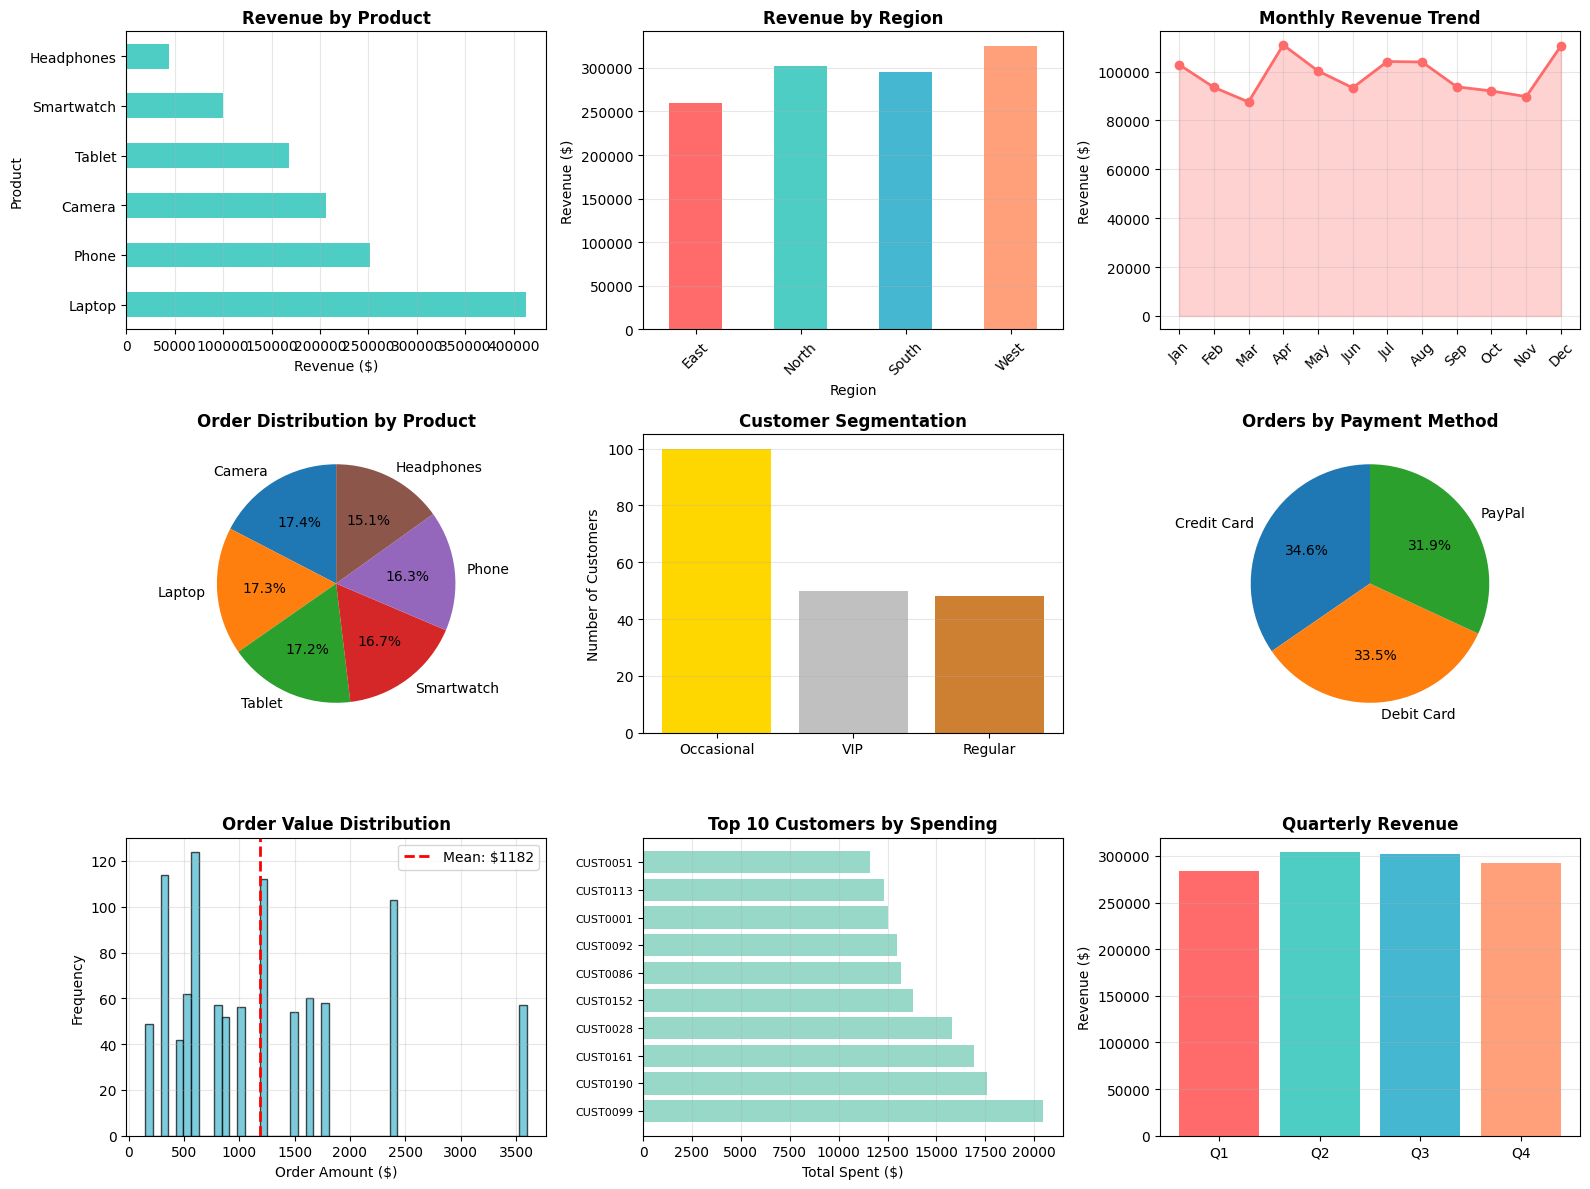


✅ Analysis Complete! Dashboard generated above.


In [7]:
# Real-World Business Case: E-commerce Analytics

print("🛒 E-COMMERCE ANALYTICS DASHBOARD")
print("="*80)
import matplotlib.pyplot as plt
# Generate realistic e-commerce data
np.random.seed(42)
n_orders = 1000

# Create orders data
dates = pd.date_range(start='2024-01-01', end='2024-12-31', periods=n_orders)
customers = [f'CUST{i:04d}' for i in np.random.randint(1, 201, n_orders)]
products = np.random.choice(['Laptop', 'Phone', 'Tablet', 'Headphones', 'Smartwatch', 'Camera'], n_orders)
quantities = np.random.randint(1, 4, n_orders)
prices = {'Laptop': 1200, 'Phone': 800, 'Tablet': 500, 'Headphones': 150, 'Smartwatch': 300, 'Camera': 600}
regions = np.random.choice(['North', 'South', 'East', 'West'], n_orders)
payment_methods = np.random.choice(['Credit Card', 'PayPal', 'Debit Card'], n_orders)

orders = pd.DataFrame({
    'Order_ID': [f'ORD{i:05d}' for i in range(1, n_orders + 1)],
    'Date': dates,
    'Customer_ID': customers,
    'Product': products,
    'Quantity': quantities,
    'Region': regions,
    'Payment_Method': payment_methods
})

orders['Unit_Price'] = orders['Product'].map(prices)
orders['Total_Amount'] = orders['Unit_Price'] * orders['Quantity']
orders['Month'] = orders['Date'].dt.month
orders['Quarter'] = orders['Date'].dt.quarter

print("\n📊 Sample Orders Data:")
print(orders.head(10))
print(f"\nTotal Orders: {len(orders):,}")
print(f"Date Range: {orders['Date'].min().date()} to {orders['Date'].max().date()}")
print("\n" + "="*80)

# Analysis 1: Overall Metrics
print("\n1️⃣ OVERALL BUSINESS METRICS")
print("-" * 40)
total_revenue = orders['Total_Amount'].sum()
avg_order_value = orders['Total_Amount'].mean()
total_customers = orders['Customer_ID'].nunique()
total_products_sold = orders['Quantity'].sum()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Total Customers: {total_customers:,}")
print(f"Total Products Sold: {total_products_sold:,}")
print(f"Average Products per Order: {total_products_sold/len(orders):.2f}")

# Analysis 2: Product Performance
print("\n2️⃣ PRODUCT PERFORMANCE")
print("-" * 40)
product_performance = orders.groupby('Product').agg({
    'Total_Amount': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).round(2)
product_performance.columns = ['Revenue', 'Avg_Order_Value', 'Num_Orders', 'Units_Sold']
product_performance = product_performance.sort_values('Revenue', ascending=False)
print(product_performance)

# Analysis 3: Regional Performance
print("\n3️⃣ REGIONAL PERFORMANCE")
print("-" * 40)
regional_performance = orders.groupby('Region').agg({
    'Total_Amount': 'sum',
    'Order_ID': 'count',
    'Customer_ID': 'nunique'
}).round(2)
regional_performance.columns = ['Revenue', 'Orders', 'Unique_Customers']
regional_performance['Avg_Order_Value'] = (regional_performance['Revenue'] / regional_performance['Orders']).round(2)
print(regional_performance)

# Analysis 4: Monthly Trends
print("\n4️⃣ MONTHLY REVENUE TRENDS")
print("-" * 40)
monthly_revenue = orders.groupby('Month')['Total_Amount'].agg(['sum', 'mean', 'count'])
monthly_revenue.columns = ['Total_Revenue', 'Avg_Order_Value', 'Num_Orders']
monthly_revenue.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(monthly_revenue.round(2))

# Analysis 5: Customer Segmentation
print("\n5️⃣ CUSTOMER SEGMENTATION")
print("-" * 40)
customer_stats = orders.groupby('Customer_ID').agg({
    'Total_Amount': 'sum',
    'Order_ID': 'count'
})
customer_stats.columns = ['Total_Spent', 'Order_Count']
customer_stats['Avg_Order_Value'] = (customer_stats['Total_Spent'] / customer_stats['Order_Count']).round(2)

# Segment customers
def segment_customer(row):
    if row['Total_Spent'] > customer_stats['Total_Spent'].quantile(0.75):
        return 'VIP'
    elif row['Total_Spent'] > customer_stats['Total_Spent'].quantile(0.5):
        return 'Regular'
    else:
        return 'Occasional'

customer_stats['Segment'] = customer_stats.apply(segment_customer, axis=1)
segment_summary = customer_stats.groupby('Segment').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Order_Count': 'mean'
}).round(2)
print(segment_summary)

# Analysis 6: Payment Method Insights
print("\n6️⃣ PAYMENT METHOD ANALYSIS")
print("-" * 40)
payment_analysis = orders.groupby('Payment_Method').agg({
    'Total_Amount': ['sum', 'mean'],
    'Order_ID': 'count'
}).round(2)
payment_analysis.columns = ['Total_Revenue', 'Avg_Order_Value', 'Num_Orders']
payment_analysis['Revenue_Share_%'] = ((payment_analysis['Total_Revenue'] / payment_analysis['Total_Revenue'].sum()) * 100).round(2)
print(payment_analysis)

# Comprehensive Visualization
fig = plt.figure(figsize=(16, 12))

# 1. Product Revenue
ax1 = plt.subplot(3, 3, 1)
product_performance['Revenue'].plot(kind='barh', ax=ax1, color='#4ECDC4')
ax1.set_title('Revenue by Product', fontsize=12, fontweight='bold')
ax1.set_xlabel('Revenue ($)')
ax1.grid(True, alpha=0.3, axis='x')

# 2. Regional Performance
ax2 = plt.subplot(3, 3, 2)
regional_performance['Revenue'].plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
ax2.set_title('Revenue by Region', fontsize=12, fontweight='bold')
ax2.set_ylabel('Revenue ($)')
ax2.set_xticklabels(regional_performance.index, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Monthly Trends
ax3 = plt.subplot(3, 3, 3)
ax3.plot(monthly_revenue.index, monthly_revenue['Total_Revenue'], marker='o', linewidth=2, color='#FF6B6B')
ax3.fill_between(range(len(monthly_revenue)), monthly_revenue['Total_Revenue'], alpha=0.3, color='#FF6B6B')
ax3.set_title('Monthly Revenue Trend', fontsize=12, fontweight='bold')
ax3.set_ylabel('Revenue ($)')
ax3.set_xticklabels(monthly_revenue.index, rotation=45)
ax3.grid(True, alpha=0.3)

# 4. Product Distribution (Pie)
ax4 = plt.subplot(3, 3, 4)
product_counts = orders['Product'].value_counts()
ax4.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%', startangle=90)
ax4.set_title('Order Distribution by Product', fontsize=12, fontweight='bold')

# 5. Customer Segments
ax5 = plt.subplot(3, 3, 5)
segment_counts = customer_stats['Segment'].value_counts()
colors = ['#FFD700', '#C0C0C0', '#CD7F32']
ax5.bar(segment_counts.index, segment_counts.values, color=colors)
ax5.set_title('Customer Segmentation', fontsize=12, fontweight='bold')
ax5.set_ylabel('Number of Customers')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Payment Methods
ax6 = plt.subplot(3, 3, 6)
payment_analysis['Num_Orders'].plot(kind='pie', ax=ax6, autopct='%1.1f%%', startangle=90)
ax6.set_title('Orders by Payment Method', fontsize=12, fontweight='bold')
ax6.set_ylabel('')

# 7. Order Value Distribution
ax7 = plt.subplot(3, 3, 7)
ax7.hist(orders['Total_Amount'], bins=50, edgecolor='black', alpha=0.7, color='#45B7D1')
ax7.axvline(orders['Total_Amount'].mean(), color='r', linestyle='--', linewidth=2, label=f"Mean: ${orders['Total_Amount'].mean():.0f}")
ax7.set_title('Order Value Distribution', fontsize=12, fontweight='bold')
ax7.set_xlabel('Order Amount ($)')
ax7.set_ylabel('Frequency')
ax7.legend()
ax7.grid(True, alpha=0.3)

# 8. Top 10 Customers
ax8 = plt.subplot(3, 3, 8)
top_customers = customer_stats.nlargest(10, 'Total_Spent')['Total_Spent']
ax8.barh(range(len(top_customers)), top_customers.values, color='#98D8C8')
ax8.set_yticks(range(len(top_customers)))
ax8.set_yticklabels(top_customers.index, fontsize=8)
ax8.set_title('Top 10 Customers by Spending', fontsize=12, fontweight='bold')
ax8.set_xlabel('Total Spent ($)')
ax8.grid(True, alpha=0.3, axis='x')

# 9. Quarterly Performance
ax9 = plt.subplot(3, 3, 9)
quarterly = orders.groupby('Quarter')['Total_Amount'].sum()
ax9.bar(['Q1', 'Q2', 'Q3', 'Q4'], quarterly.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
ax9.set_title('Quarterly Revenue', fontsize=12, fontweight='bold')
ax9.set_ylabel('Revenue ($)')
ax9.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Analysis Complete! Dashboard generated above.")
